In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Folder path containing audio files
data_dir = '/content/drive/Shareddrives/2022 DOUTORADO Larissa Rodrigues/6 CRISP API/AUDIO/Doritos'

# Change the current working directory
import os
os.chdir(data_dir)

In [52]:
!ls

dados.xlsx	 DoritosD027.wav  DoritosD112.wav  DoritosD235.wav
DoritosD022.wav  DoritosD098.wav  DoritosD130.wav
DoritosD023.wav  DoritosD099.wav  DoritosD189.wav
DoritosD026.wav  DoritosD100.wav  DoritosD192.wav


frame_length = 215
hop_length =  4
Ad. Energia Sonora =  3.2279103994369507
onset_env= [7.7730155 7.647833  7.240925 ]
Ad. dos Picos de Amplitude =  8.746325075626373


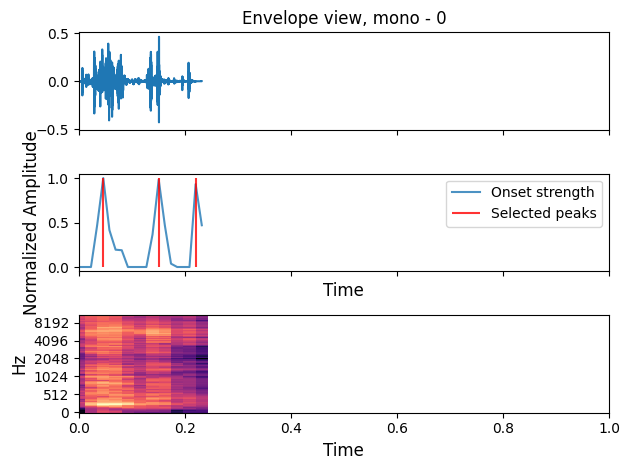

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  2.420143783092499
onset_env= [18.718403 27.45444   7.88278 ]
Ad. dos Picos de Amplitude =  5.906763017177582


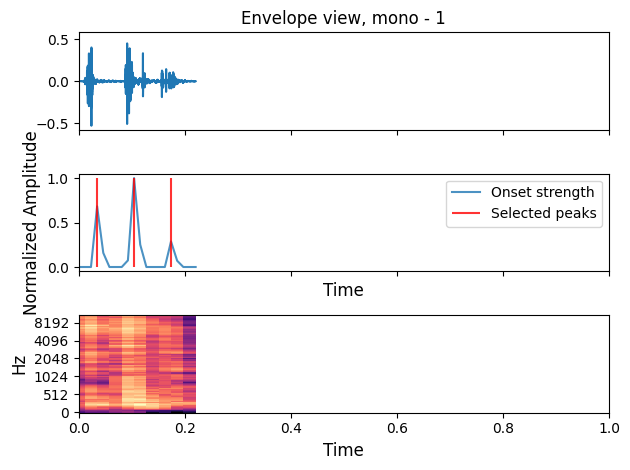

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  3.6733318120241165
onset_env= [8.338011  3.1733618 1.682569  2.7162037 4.704609 ]
Ad. dos Picos de Amplitude =  12.361913621425629


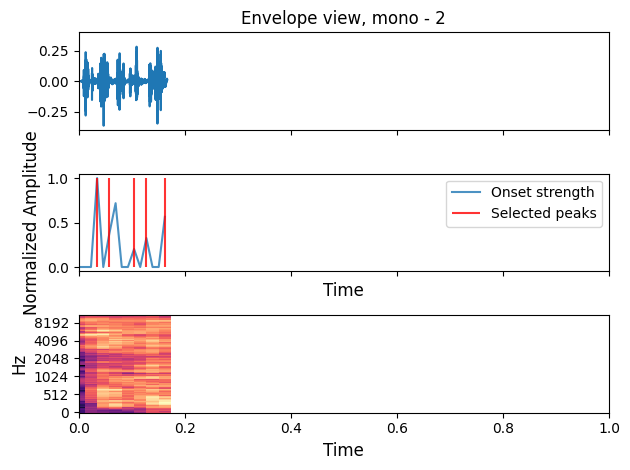

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  1.2834152206778526
onset_env= [21.91348     5.406807    0.87501717  8.114542    1.6519728 ]
Ad. dos Picos de Amplitude =  8.661750312894583


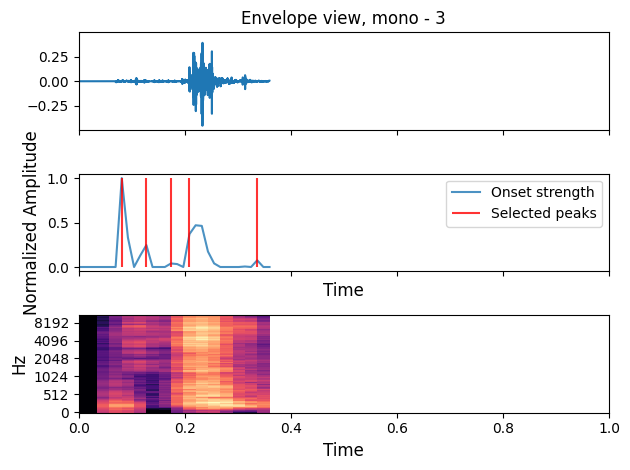

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  2.627144381403923
onset_env= [10.698633   1.7254432  0.9435675  0.2621193  1.6474342 10.755794 ]
Ad. dos Picos de Amplitude =  14.522214777767658


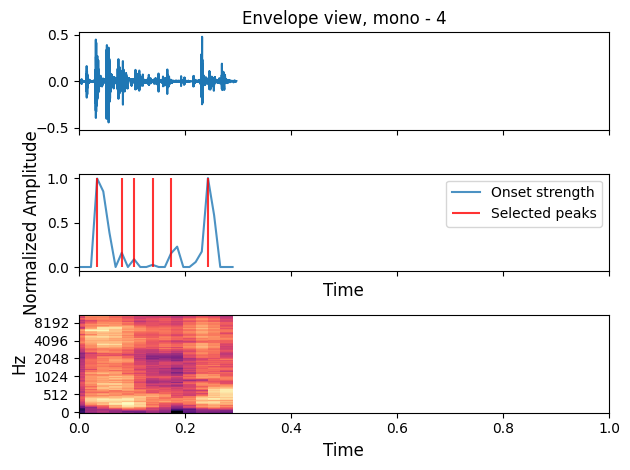

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  1.6180038452148438
onset_env= [ 6.769493  15.073765   2.2366056  3.7587585  6.801199   9.505262
  6.601799   3.8909883]
Ad. dos Picos de Amplitude =  28.997597694396973


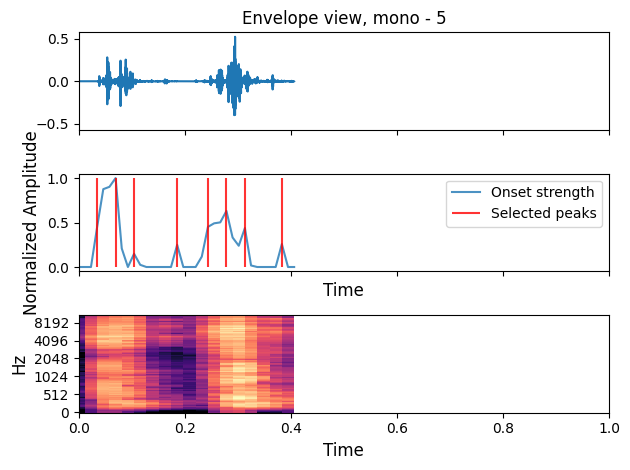

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  2.262643352150917
onset_env= [1.8287952  8.930429   4.226903   0.57198715 4.9574995  7.49518
 2.5592246 ]
Ad. dos Picos de Amplitude =  23.961908161640167


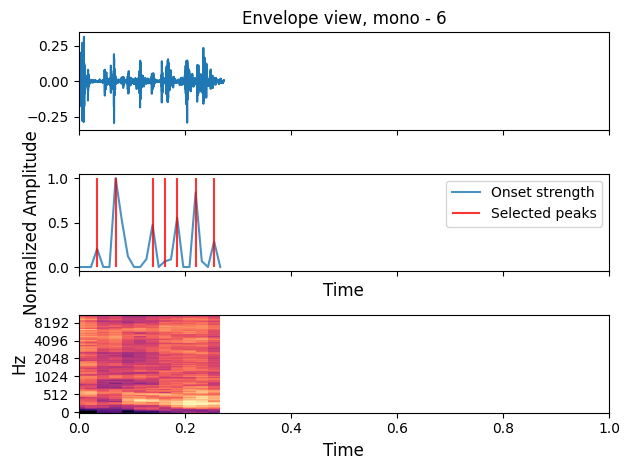

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  3.6949753761291504
onset_env= [ 5.255533  24.87246    9.045704   2.8329382  2.4569244 20.153751
  4.542795 ]
Ad. dos Picos de Amplitude =  19.46412841975689


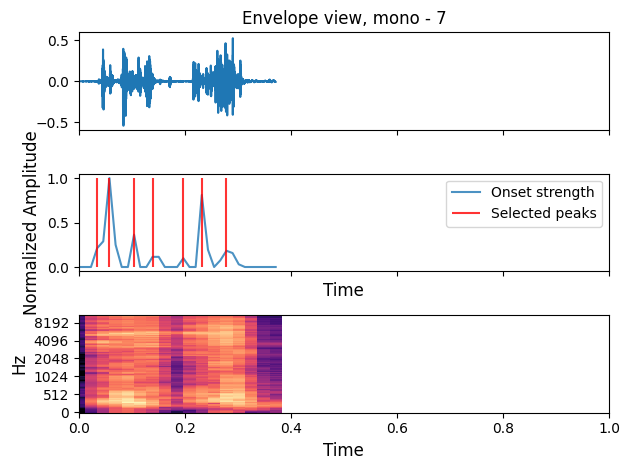

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  1.9842876121401787
onset_env= [ 1.6359234   9.382626   19.903925    9.797064    9.92834     0.31390858
  0.8319664   5.7152557   8.964203    5.057766    6.3565693   3.620551  ]
Ad. dos Picos de Amplitude =  49.1409198269248


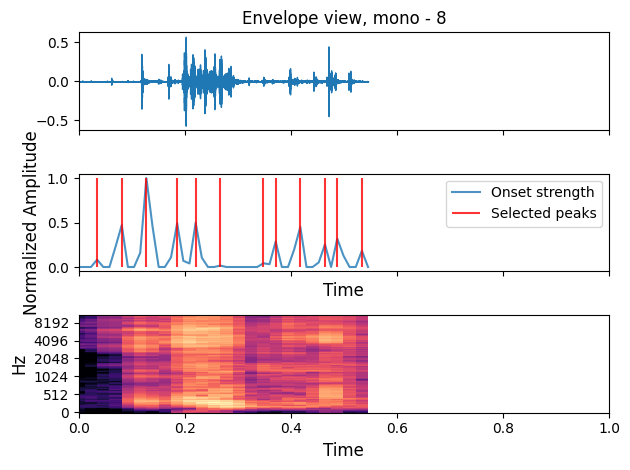

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  7.669900357723236
onset_env= [2.4467244 2.7674928 2.63288   1.5000601 8.048549  1.5942576]
Ad. dos Picos de Amplitude =  14.156562387943268


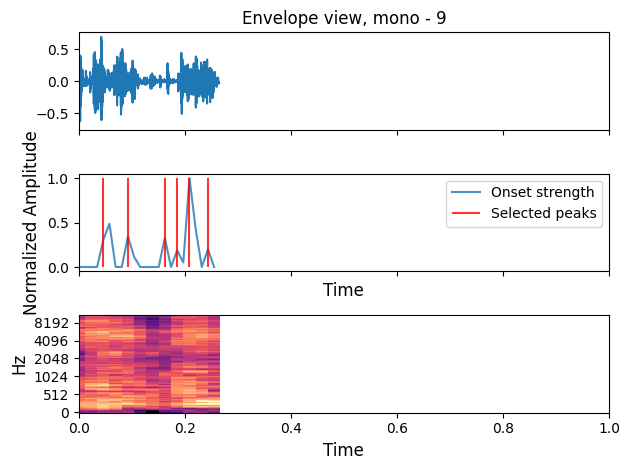

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  3.3779550343751907
onset_env= [13.048058   0.8093114  1.9440801  1.7480539  6.560994   4.334055
  2.1793666]
Ad. dos Picos de Amplitude =  16.429068367928267


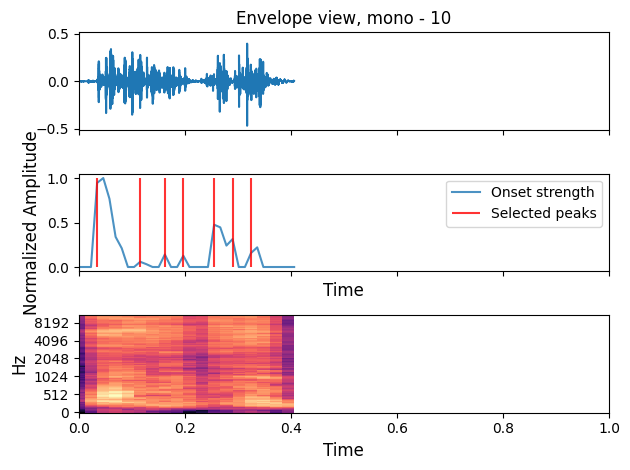

frame_length = 215
hop_length =  4
Ad. Energia Sonora =  2.9093563556671143
onset_env= [30.317825   3.2840462  0.5470073  1.6955848  4.069601   2.9343681]
Ad. dos Picos de Amplitude =  8.47984954342246


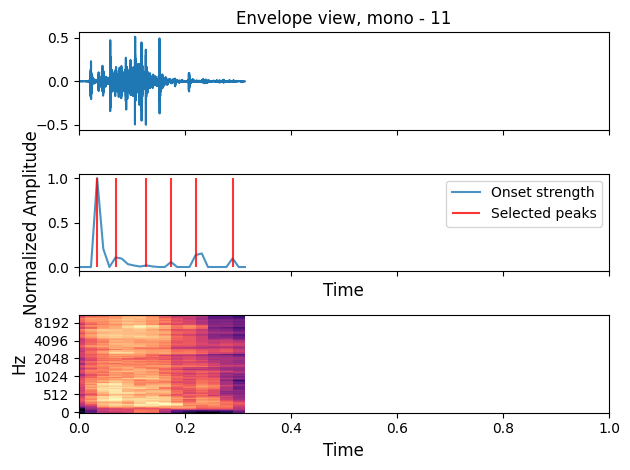

In [65]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
from glob import glob

# Folder path containing audio files
#data_dir = '/content/...'
audio_files = glob(data_dir + "/*.wav")

# Create an empty list to hold DataFrames
df_list = []

for file in range(0, len(audio_files), 1):
    y, sr = librosa.load(audio_files[file], sr=44100, duration=1.0)
    time = np.arange(0, len(y)) / sr

    # Ad. energia Sonora
    # Detect the silence regions
    #threshold = 20  # threshold in dB
    #silence_regions = librosa.effects.split(y, top_db=threshold)
    # Remove the silence regions from the audio signal
    #y_trimmed = np.concatenate([y[start:end] for start, end in silence_regions])

    # Unchek to DO NOT remove the silent regions
    y_trimmed = y

    # Compute the energy of each frame
    #frame_length = int(sr * 0.01)  # frame length in samples (10 ms frames)
    #hop_length = int(sr * 0.005)  # hop length in samples (5 ms hops)
    frame_length = librosa.time_to_frames(5.0)
    hop_length = librosa.time_to_frames(0.10)
    print('frame_length =',frame_length)
    print('hop_length = ', hop_length)
    energy = librosa.feature.rms(y=y_trimmed, frame_length=frame_length, hop_length=hop_length)

    # Compute the median energy
    avg_energy = np.mean(energy) * 100
    print('Ad. Energia Sonora = ', avg_energy)

    # Parameters for peak picking
    pre_max = 1     # Consider peaks close to the current frame
    post_max = 1    # Consider peaks close to the current frame
    pre_avg = 1     # Calculate average from the immediate previous frame
    post_avg = 2    # Calculate average from the immediate next frame
    delta = 0.1     # Lower threshold for peak detection
    wait = 1        # Allow peaks to be detected in consecutive frames

    # Ad. dos picos de Amplitude
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512, aggregate=np.median)
    peaks = librosa.util.peak_pick(
        onset_env, pre_max=pre_max, post_max=post_max, pre_avg=pre_avg, post_avg=post_avg, delta=delta, wait=wait)
    times = librosa.times_like(onset_env, sr=sr, hop_length=512)
    print('onset_env=', onset_env[peaks])

    in_sum = onset_env[peaks]
    suma = in_sum / max(in_sum)
    value = sum(suma) * len(suma)
    print('Ad. dos Picos de Amplitude = ', value)
    ons = onset_env / max(onset_env)

    # Criar o DataFrame pro excel
    dc = {'Ad. Energia Sonora': [avg_energy], 'Ad. dos Picos de Amplitude': [value],
          'C Sonoro':[avg_energy*value]}
    df2 = pd.DataFrame(dc)
    df_list.append(df2)

    import matplotlib.pyplot as plt
    y, sr = librosa.load(audio_files[file], duration=10)
    fig, ax = plt.subplots(nrows=3, sharex=True)
    librosa.display.waveshow(y, sr=sr, ax=ax[0])
    ax[0].set(title=f'Envelope view, mono - {file}')
    ax[0].label_outer()

    ax[1].plot(times, ons, alpha=0.8, label='Onset strength')
    ax[1].set_ylabel('Normalized Amplitude', fontsize=12)
    ax[1].vlines(times[peaks], 0, ons.max(), color='r', alpha=0.8, label='Selected peaks')
    ax[1].legend(frameon=True, framealpha=0.8)
    ax[1].axis('tight')
    ax[1].set_xlabel('Time', fontsize=12)
    ax[1].set_xlim([0, 1])

    #D = librosa.stft(y)
    #librosa.display.specshow(librosa.amplitude_to_db(np.abs(D)**2, ref=np.max), y_axis='mel', x_axis='time', ax=ax[2])
    melspec = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=44100), ref=np.max)
    librosa.display.specshow(melspec, x_axis='time', y_axis='mel', ax=ax[2])
    ax[2].set_xscale('linear')
    ax[2].set_ylabel('Hz', fontsize=12)
    ax[2].set_xlabel('Time', fontsize=12)
    ax[2].set_xlim([0, 1])

    plt.tight_layout()
    #plt.savefig(f'{file}.png')  # Save the figure
    plt.show()

# Concatenate the list of DataFrames into a single DataFrame
df_combined = pd.concat(df_list, ignore_index=True)

# Drop the first row
df_combined = df_combined.drop(0, axis=0)

# Save the combined DataFrame to Excel
df_combined.to_excel('dados.xlsx', index=False)
